## MDS 
Multidimensional scaling (MDS) is similar to factor analysis, which reduces the number of variables one has to work with and detects structure and patterns in the relationships between variables. It helps classify variables. The end goal is to analyze and be able to find a group of variables that results in clear similarities and dissimilarities (distances) between the objects using the variables that best describe them. “In factor analysis, the similarities between objects (e.g., variables) are expressed in the correlation matrix. With MDS, you can analyze any kind of similarity or dissimilarity matrix, in addition to correlation matrices.” (More information: http://www.statsoft.com/Textbook/Principal-Components-Factor-Analysis and http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling)


A simple example of MDS is a map of cities. We can use 2 dimensions to describe the location of the cities. MDS arranges the objects (cities) in a particular dimension (2-D) to demonstrate the observed differences. “As a result, we can "explain" the distances in terms of underlying dimensions; in our example, we could explain the distances in terms of the two geographical dimensions: north/south and east/west.” (More information: http://www.statsoft.com/Textbook/Principal-Components-Factor-Analysis and http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling)

In [55]:
!pip install datascience

#a bunch of import statements for the functions we'll be using
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [98]:
file = open('Erik/onegramfilteredtfidf.csv', 'rt', encoding = "utf8") 
file

<_io.TextIOWrapper name='Erik/onegramfilteredtfidf.csv' mode='rt' encoding='utf8'>

In [101]:
#figure out which decoding is the correct one to use
import pkgutil
import encodings
import os

def all_encodings():
    modnames = set([modname for importer, modname, ispkg in pkgutil.walk_packages(
        path=[os.path.dirname(encodings.__file__)], prefix='')])
    aliases = set(encodings.aliases.aliases.values())
    return modnames.union(aliases)

text = b'\x96'
for enc in all_encodings():
    try:
        msg = text.decode(enc)
    except Exception:
        continue
    if msg == 'ñ':
        print('Decoding {t} with {enc} is {m}'.format(t=text, enc=enc, m=msg))

Decoding b'\x96' with mac_arabic is ñ
Decoding b'\x96' with mac_farsi is ñ
Decoding b'\x96' with mac_roman is ñ
Decoding b'\x96' with mac_romanian is ñ
Decoding b'\x96' with mac_croatian is ñ
Decoding b'\x96' with mac_iceland is ñ
Decoding b'\x96' with mac_turkish is ñ


/Users/stephkim/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: DeprecationWarning: unicode_internal codec has been deprecated


In [102]:
first = True
texts = []
with open('Erik/onegramfilteredtfidf.csv', 'r', encoding='mac_roman') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for line in reader:
        if(first):
            words = line
            first = False
        else:
            texts.append(line[0])
words = words[1:]

In [103]:
print(words[:10]) #print out the first 10 words as a sanity check
print(len(words))

['1-kam-ma[1st]NU', '1/2[1/2]NU', '1/3[1/3]NU', '10-kam-ma[10th]NU', '1000[1000]NU', '100[100]NU', '108000[108000]NU', '1080[1080]NU', '108[108]NU', '10[10]NU']
4302


In [104]:
def doc_name(index):
    return texts[index]

In [105]:
erikcsv = open('Erik/onegramfilteredtfidf.csv', 'r', encoding='mac_roman') 
dtm = np.loadtxt(erikcsv, delimiter=',', skiprows=1, converters = {0: lambda s: 0})
dtm = np.delete(dtm, 0, 1)
dtm

array([[ 0.22870994,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [106]:
len(dtm)

356

In [107]:
import numpy as np
from datascience import *

from sklearn.feature_extraction.text import CountVectorizer
#import pandas as pd
from sklearn.metrics import pairwise
pairwise.pairwise_distances(dtm, metric='euclidean')

dist_matrix = pairwise.pairwise_distances(dtm, metric='euclidean')
Table(texts).with_rows(dist_matrix)

c.0.1.1,c.0.1.2,c.0.2.01,c.0.2.02,c.0.2.03,c.0.2.04,c.0.2.06,c.0.2.07,c.0.2.08,c.0.2.11,c.0.2.13,c.1.1.1,c.1.1.2,c.1.1.3,c.1.1.4,c.1.2.1,c.1.2.2,c.1.3.1,c.1.3.2,c.1.3.3,c.1.3.4,c.1.3.5,c.1.4.1,c.1.4.1.1,c.1.4.1.3,c.1.4.3,c.1.4.4,c.1.5.1,c.1.6.1,c.1.6.2,c.1.6.3,c.1.7.1,c.1.7.3,c.1.7.4,c.1.7.6,c.1.7.7,c.1.7.8,c.1.8.1.1,c.1.8.1.2,c.1.8.1.3,c.1.8.1.4,c.1.8.1.5,c.1.8.1.5.1,c.1.8.2.1,c.1.8.2.2,c.1.8.2.3,c.1.8.2.4,c.2.1.1,c.2.1.2,c.2.1.3,c.2.1.4,c.2.1.5,c.2.1.6,c.2.1.7,c.2.2.2,c.2.2.3,c.2.2.4,c.2.2.5,c.2.2.6,c.2.3.1,c.2.3.2,c.2.4.1.1,c.2.4.1.2,c.2.4.1.3,c.2.4.1.4,c.2.4.1.5,c.2.4.1.6,c.2.4.1.7,c.2.4.1.a,c.2.4.2.01,c.2.4.2.02,c.2.4.2.03,c.2.4.2.04,c.2.4.2.05,c.2.4.2.07,c.2.4.2.14,c.2.4.2.15,c.2.4.2.16,c.2.4.2.17,c.2.4.2.18,c.2.4.2.20,c.2.4.2.21,c.2.4.2.22,c.2.4.2.24,c.2.4.2.25,c.2.4.2.26,c.2.4.2.a,c.2.4.2.b,c.2.4.3.1,c.2.4.4.1,c.2.4.4.2,c.2.4.4.3,c.2.4.4.4,c.2.4.4.6,c.2.4.4.a,c.2.4.5.1,c.2.4.5.2,c.2.4.5.3,c.2.4.5.4,c.2.4.5.5,c.2.5.1.2,c.2.5.1.3,c.2.5.1.4,c.2.5.2.1,c.2.5.3.1,c.2.5.3.2,c.2.5.3.3,c.2.5.3.4,c.2.5.4.01,c.2.5.4.02,c.2.5.4.03,c.2.5.4.04,c.2.5.4.05,c.2.5.4.08,c.2.5.4.09,c.2.5.4.10,c.2.5.4.11,c.2.5.4.13,c.2.5.4.15,c.2.5.4.17,c.2.5.4.19,c.2.5.4.21,c.2.5.4.23,c.2.5.4.24,c.2.5.4.27,c.2.5.4.29,c.2.5.4.a,c.2.5.4.b,c.2.5.5.1,c.2.5.5.2,c.2.5.5.3,c.2.5.5.4,c.2.5.5.5,c.2.5.6.1,c.2.5.6.2,c.2.5.6.3,c.2.5.6.4,c.2.5.6.5,c.2.5.6.6,c.2.5.7.1,c.2.5.7.2,c.2.5.8.1,c.2.6.2.1,c.2.6.2.a,c.2.6.6.1,c.2.6.6.5,c.2.6.7.1,c.2.6.9.1,c.2.6.9.2,c.2.6.9.3,c.2.6.9.4,c.2.6.9.5,c.2.6.9.6,c.2.6.9.7,c.2.6.9.8,c.2.7.1.1,c.2.8.2.1,c.2.8.2.2,c.2.8.2.3,c.2.8.2.4,c.2.8.2.6,c.2.8.3.1,c.2.8.3.2,c.2.8.3.3,c.2.8.3.5,c.2.8.3.6,c.2.8.5.1,c.2.8.5.a,c.2.8.5.b,c.3.1.01,c.3.1.02,c.3.1.03,c.3.1.04,c.3.1.05,c.3.1.06,c.3.1.06.1,c.3.1.07,c.3.1.08,c.3.1.11,c.3.1.11.1,c.3.1.13.2,c.3.1.15,c.3.1.16,c.3.1.17,c.3.1.18,c.3.1.19,c.3.1.20,c.3.1.21,c.3.2.02,c.3.2.03,c.3.2.04,c.3.2.05,c.3.3.01,c.3.3.02,c.3.3.03,c.3.3.04,c.3.3.05,c.3.3.08,c.3.3.09,c.3.3.10,c.3.3.11,c.3.3.21,c.3.3.22,c.3.3.39,c.4.01.1,c.4.02.1,c.4.03.1,c.4.05.1,c.4.06.1,c.4.07.1,c.4.07.2,c.4.07.3,c.4.07.4,c.4.07.5,c.4.07.6,c.4.07.7,c.4.07.8,c.4.07.9,c.4.07.a,c.4.08.01,c.4.08.02,c.4.08.03,c.4.08.04,c.4.08.05,c.4.08.06,c.4.08.07,c.4.08.08,c.4.08.09,c.4.08.10,c.4.08.15,c.4.08.16,c.4.08.18,c.4.08.20,c.4.08.23,c.4.08.25,c.4.08.26,c.4.08.28,c.4.08.29,c.4.08.30,c.4.08.31,c.4.08.32,c.4.08.33,c.4.08.a,c.4.12.1,c.4.12.2,c.4.13.01,c.4.13.02,c.4.13.03,c.4.13.04,c.4.13.05,c.4.13.06,c.4.13.07,c.4.13.08,c.4.13.09,c.4.13.10,c.4.13.11,c.4.13.12,c.4.13.13,c.4.13.14,c.4.13.15,c.4.13.a,c.4.13.c,c.4.14.1,c.4.14.2,c.4.14.3,c.4.15.2,c.4.15.3,c.4.16.1,c.4.16.2,c.4.17.1,c.4.19.1,c.4.19.2,c.4.19.3,c.4.21.1,c.4.22.1,c.4.22.2,c.4.22.4,c.4.22.5,c.4.22.6,c.4.23.1,c.4.24.1,c.4.25.1,c.4.25.2,c.4.26.1,c.4.27.01,c.4.27.02,c.4.27.03,c.4.27.04,c.4.27.06,c.4.27.07,c.4.28.1,c.4.29.1,c.4.29.2,c.4.31.1,c.4.32.2,c.4.32.e,c.4.32.f,c.4.33.1,c.4.33.2,c.4.80.1,c.4.80.2,c.4.80.4,c.5.1.3,c.5.2.4,c.5.2.5,c.5.3.1,c.5.3.2,c.5.3.3,c.5.3.5,c.5.3.6,c.5.3.7,c.5.4.11,c.5.4.12,c.5.5.1,c.5.5.2,c.5.5.3,c.5.5.4,c.5.5.5,c.5.5.a,c.5.6.1,c.5.6.3,c.5.6.5,c.5.7.1,c.5.7.2,c.5.9.1,c.5.9.2,c.6.1.01,c.6.1.02,c.6.1.03,c.6.1.04,c.6.1.05,c.6.1.07,c.6.1.08,c.6.1.09,c.6.1.10,c.6.1.11,c.6.1.12,c.6.1.13,c.6.1.14,c.6.1.15,c.6.1.16,c.6.1.17,c.6.1.18,c.6.1.19,c.6.1.21,c.6.1.22,c.6.1.23,c.6.1.24,c.6.1.25,c.6.1.26,c.6.1.27,c.6.1.28,c.6.2.1,c.6.2.2,c.6.2.3,c.6.2.5
0,1.3926,1.39057,1.38735,1.4122,1.40769,1.40838,1.402,1.40274,1.41421,1.39422,1.36952,1.36685,1.33662,1.3554,1.39795,1.38206,1.38339,1.38315,1.37889,1.41207,1.39486,1.3539,1.37482,1.40814,1.37145,1.4056,1.40184,1.37668,1.37587,1.36248,1.39276,1.41115,1.35752,1.37105,1.40719,1.39847,1.40033,1.37052,1.38701,1.37349,1.36273,1.35903,1.35907,1.37319,1.37568,1.3388,1.39078,1.40587,1.41309,1.39954,1.3599,1.39812,1.38014,1.40138,1.37065,1.37899,1.38189,1.35443,1.40096,1.40144,1.38571,1.38359,1.39018,1.40793,1.39941,1.40268,1.41087,1.38224,1.37066,1.34278,1.3561,1.38108,1.37875,1.37316,1.39943,1.37594,1.39902,1.38767,1.38768,1.40092,1.40066,1.38372,1.37457

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2, dissimilarity="precomputed")
embeddings = mds.fit_transform(dist_matrix)

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(13):
    ax.annotate(i+1, ((embeddings[i,0], embeddings[i,1])))

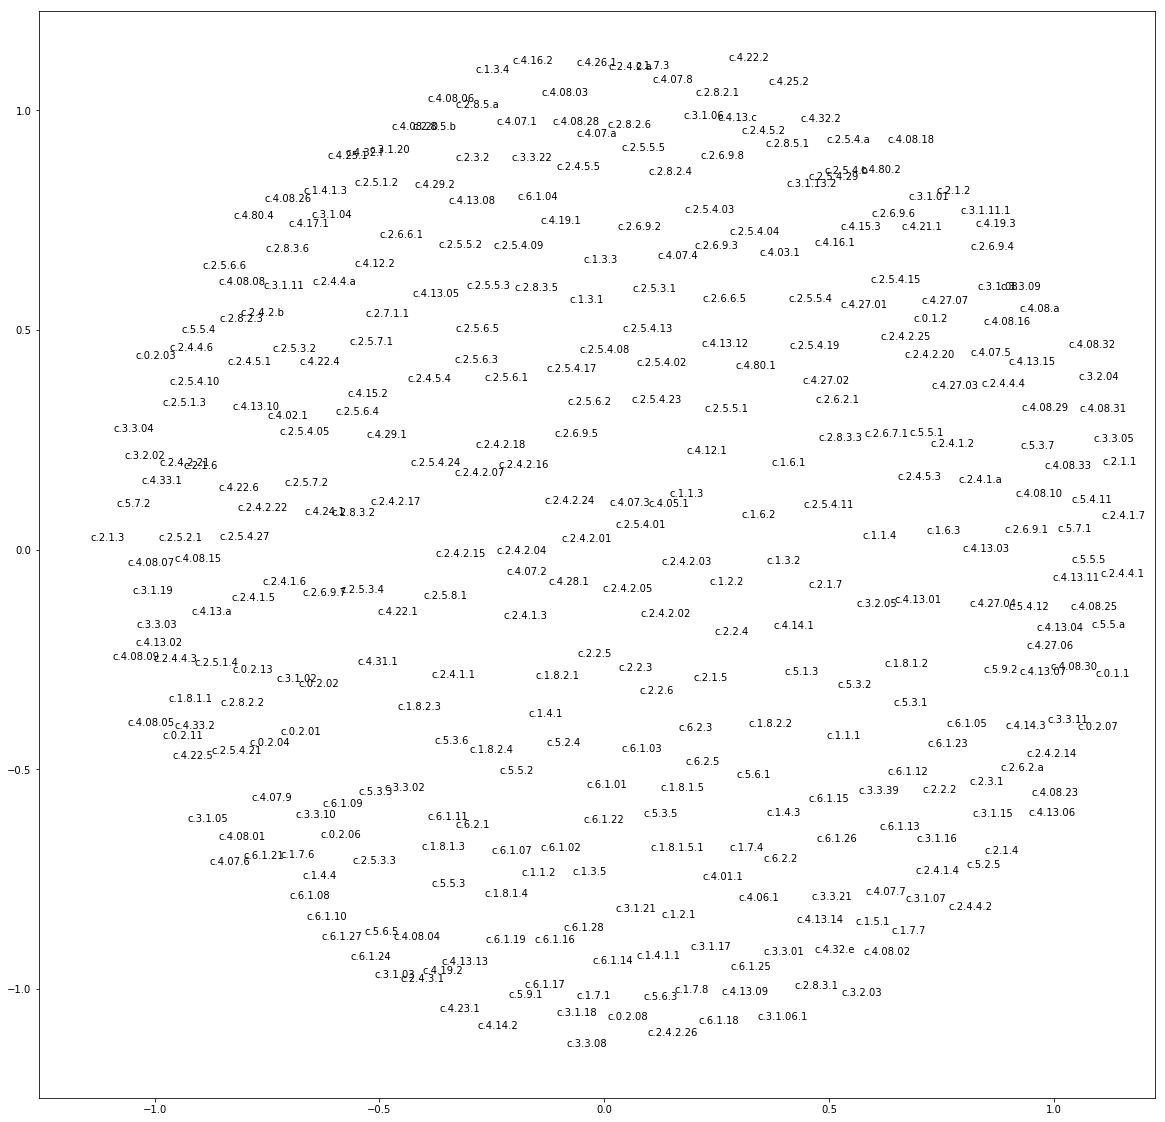

In [111]:
mds2 = MDS(n_components = 2, dissimilarity="euclidean")
embeddings = mds.fit_transform(dist_matrix)

_, ax = plt.subplots(figsize=(20,20))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(356):
    ax.annotate(texts[i], ((embeddings[i,0], embeddings[i,1])))
plt.show()

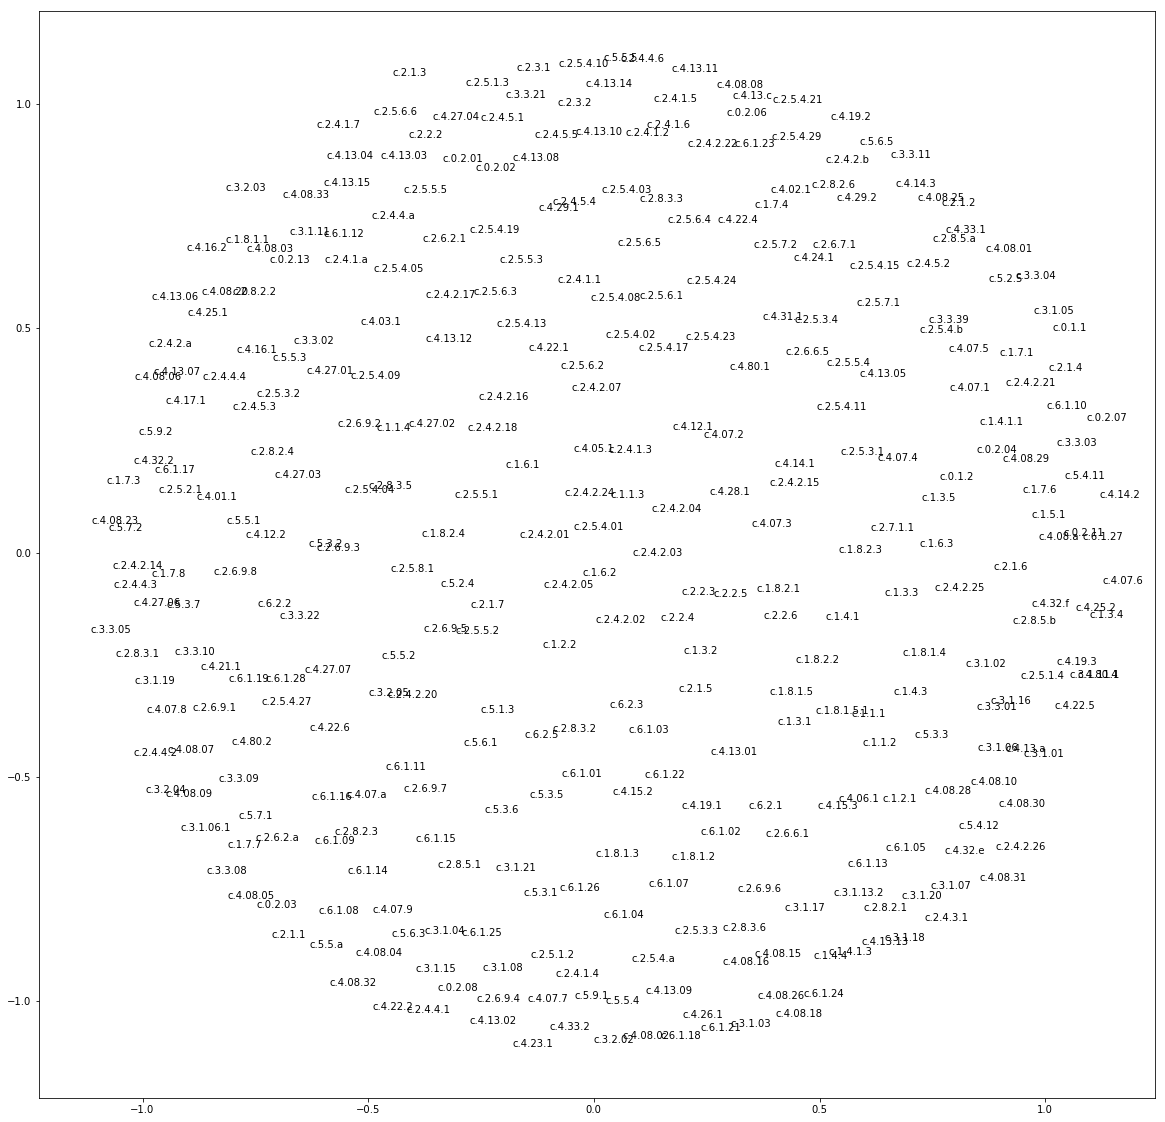

In [112]:
mds2 = MDS(n_components = 3, dissimilarity="euclidean")
embeddings = mds.fit_transform(dist_matrix)

_, ax = plt.subplots(figsize=(20,20))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(356):
    ax.annotate(texts[i], ((embeddings[i,0], embeddings[i,1])))
plt.show()

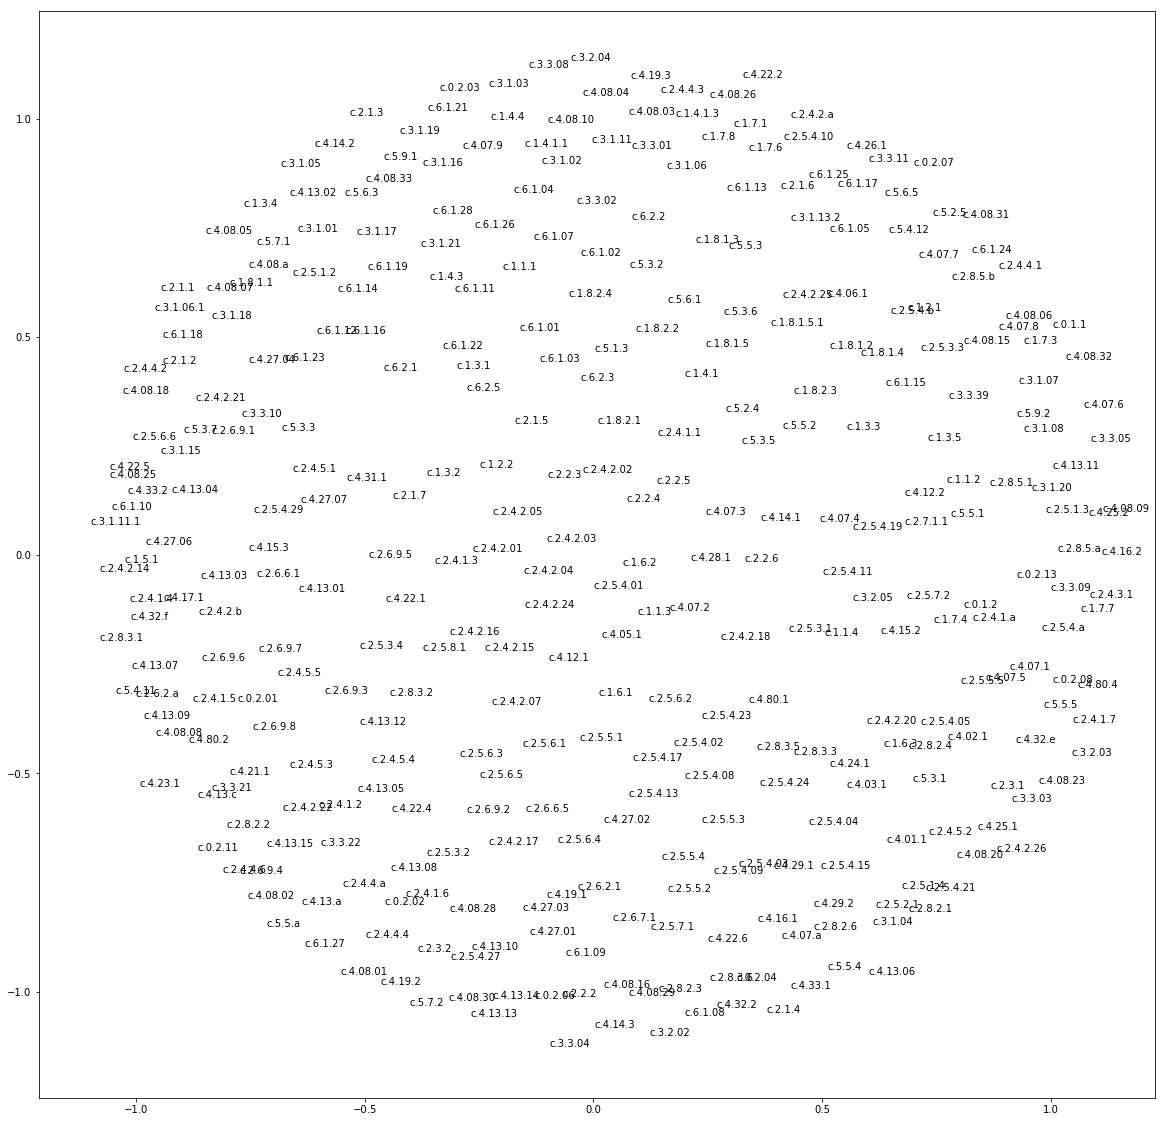

In [113]:
mds2 = MDS(n_components = 7, dissimilarity="euclidean")
embeddings = mds.fit_transform(dist_matrix)

_, ax = plt.subplots(figsize=(20,20))

ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(356):
    ax.annotate(texts[i], ((embeddings[i,0], embeddings[i,1])))
plt.show()